#### Ejercicio 1:

Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados. 

In [ ]:
project_duplicated = kickstarter_2018[kickstarter_2018.duplicated(subset=['name'])]


In [ ]:
project_duplicated_hash = kickstarter_2018[kickstarter_2018.duplicated(subset=['name','code'])]

project_duplicated_hash.shape

union = pd.merge(project_duplicated,project_duplicated_hash[['code','name']],on=['name'],how='left')

#Veo si quedó algun proyecto sin unir
union[union.code=='']

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,code


#### Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [ ]:
# read in the file with the encoding detected by chardet
kickstarter_2018nvo = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", encoding='iso-8859-1')

# look at the first few lines
kickstarter_2018nvo.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00


In [ ]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)


kickstarter_2018nvo['name_weirdness'] = kickstarter_2018nvo['name'].apply(weird)
kickstarter_2018nvo[kickstarter_2018nvo['name_weirdness'] > 1]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
63,1000235643,HIIT Bottleâ¢,Drinks,Food,USD,2015-04-27,15000.00,2015-03-13 18:33:08,124998.00,successful,2784,US,124998.00,124998.00,15000.00,2
70,1000260691,Gizbeeâ¢ Unlimited Removable Storage for Your...,Gadgets,Technology,USD,2016-03-25,87000.00,2016-02-29 20:30:27,2030.00,canceled,15,US,2030.00,2030.00,87000.00,2
123,1000519001,Wordwright: reÂ·deÂ·finÂ·ing word play,Tabletop Games,Games,USD,2015-12-29,2000.00,2015-11-21 14:12:27,14794.00,successful,624,US,14794.00,14794.00,2000.00,6
157,1000644119,OperaciÃ³n Douve,Action,Film & Video,EUR,2016-05-01,100.00,2016-03-02 19:09:05,20.00,failed,2,ES,21.77,22.85,114.27,2
184,1000767040,Strait Jacket â Tangle Prevention For Headph...,Product Design,Design,USD,2016-11-23,30000.00,2016-10-24 03:35:51,1041.00,canceled,46,US,549.00,1041.00,30000.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378522,999270657,"Cotopaxi ConnectâCustom Gear, Co-Designed",Product Design,Design,USD,2017-01-19,25000.00,2016-11-20 08:00:35,6477.00,canceled,124,US,1505.00,6477.00,25000.00,4
378568,999501752,SmartnannyÂ®. The worldâs first smart nanny.,Technology,Technology,EUR,2015-07-28,400000.00,2015-06-23 15:01:09,1444.00,failed,15,DE,1642.89,1583.63,438678.26,3
378579,999567575,l'arbalÃ¨te (surface lift ski),Fashion,Fashion,CHF,2015-12-04,10000.00,2015-11-04 08:50:21,0.00,failed,0,CH,0.00,0.00,10018.33,4
378612,999754150,31â¢13: Thesis Exhibition,Mixed Media,Art,USD,2013-03-20,8000.00,2013-02-18 18:46:29,8935.00,successful,121,US,8935.00,8935.00,8000.00,2


In [ ]:
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,code,name_weirdness
ID,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,81609b3bdc0b96f429672d69702f2524,0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,c12f5c3bace2f0213cdb2679a265dca0,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,9c01404a2ef702811c2088ce139042ad,0


In [ ]:
other_column = 'currency'
lb = LabelBinarizer()
lb_results = lb.fit_transform(kickstarter_2018[other_column])
pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
column='currency'
column_encode='currency_encode'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))
# Apply the fitted encoder to the pandas column
kickstarter_2018['currency_encode'] = le.transform(kickstarter_2018[column]) 

In [ ]:
print('Porcentaje de proyectos exitosos que no cumplieron el objetivo',
      len(kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)])/len(kickstarter_2018[(kickstarter_2018.state == 'successful')])*100)

Porcentaje de proyectos exitosos que no cumplieron el objetivo 0.0037325689032219533


In [ ]:
nogoals = kickstarter_2018[(kickstarter_2018.pledged < kickstarter_2018.goal)]
nogoals.pivot_table(values='usd_pledged',index='state',columns='main_category', aggfunc=np.count_nonzero)

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
canceled,1213.00,626.00,428.00,96.00,3360.00,1601.00,3489.00,1220.00,4919.00,223.00,1796.00,485.00,1959.00,3170.00,366.00
failed,10188.00,3504.00,3890.00,949.00,12709.00,9737.00,24243.00,11721.00,13576.00,1969.00,15387.00,4591.00,16535.00,14889.00,2892.00
live,79.00,35.00,34.00,7.00,168.00,114.00,169.00,98.00,163.00,11.00,137.00,24.00,137.00,165.00,26.00
successful,2.00,nan,nan,nan,1.00,nan,2.00,nan,nan,nan,nan,nan,nan,nan,nan
suspended,41.00,13.00,38.00,8.00,134.00,64.00,53.00,68.00,106.00,20.00,50.00,19.00,29.00,241.00,11.00
undefined,nan,nan,nan,0.00,0.00,0.00,0.00,nan,nan,nan,0.00,0.00,0.00,0.00,0.00


#### Ejercicio 6

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

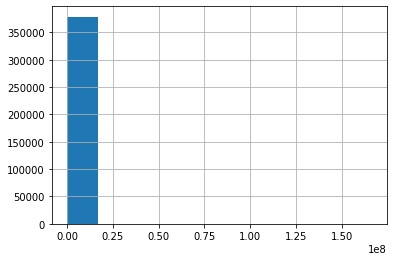

In [ ]:
%matplotlib inline
kickstarter_2018.usd_goal_real.hist();

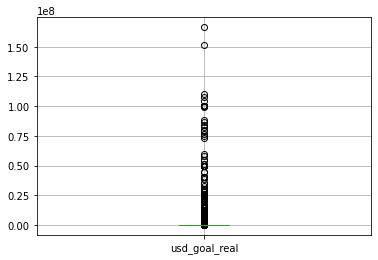

In [ ]:
kickstarter_2018.boxplot(column='usd_goal_real');

In [ ]:
outliers = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]
outliers

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,code,name_weirdness,currency_encode
ID,,,,,,,,,,,,,,,,,
1009207145,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.00,2014-06-21 22:34:21,285.00,failed,5,CA,263.41,264.67,3575408.62,678b49f4df949a12dfbe6e230f2f8e71,0,1
1015466274,Genesis,Film & Video,Film & Video,EUR,2015-09-01,5000000.00,2015-07-07 21:14:52,0.00,failed,0,IT,0.00,0.00,5568982.99,411f3239ffbefd44ebd08ac9eaec6489,0,4
1016210580,INDIRA – THE FIRST INDIAN GRAND MUSICAL,Musical,Theater,EUR,2016-04-27,15000000.00,2016-02-27 13:08:01,15.00,failed,6,ES,16.59,17.10,17104542.97,60e3c51dc0877373a1a03b9089152d75,-1,4
1025947904,Long island city new york art book (Canceled),Photography,Photography,USD,2013-11-07,10000000.00,2013-10-08 23:16:26,0.00,canceled,0,US,0.00,0.00,10000000.00,a4de48b95764aad60a73c9410003ef2f,0,13
1029500715,Harambe World's Tallest Statue,Public Art,Art,USD,2016-11-25,20000000.00,2016-09-26 18:08:01,1.00,canceled,1,US,0.00,1.00,20000000.00,e4e49c44720a7a99b7115a18bbaaff52,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992335258,XPOINT5 (Canceled),Web,Technology,USD,2015-11-09,5000000.00,2015-09-10 23:08:39,0.00,canceled,0,US,0.00,0.00,5000000.00,776c87c0e95672a7f3e747ada9b148c5,0,13
992624421,I don't know a comic book?,Comics,Comics,USD,2014-08-09,10000000.00,2014-07-10 06:11:48,10.00,failed,1,US,10.00,10.00,10000000.00,a3c1b7a332fdc474f5b81de5bcdedc60,0,13
993969686,Albert Einstein Museum,Technology,Technology,USD,2014-12-20,50000000.00,2014-10-23 01:46:17,240.00,failed,8,US,240.00,240.00,50000000.00,bc6e8f0361fed23dc58f6ae5298e598e,0,13


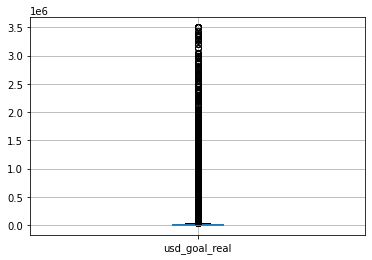

In [ ]:
kickstarter_2018.drop(outliers.index).boxplot(column='usd_goal_real');

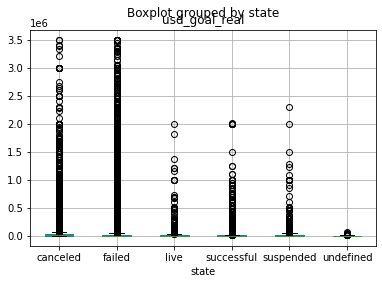

In [ ]:
kickstarter_2018.drop(outliers.index).boxplot(column='usd_goal_real',by='state');